In [1]:
import sys
# load standard python modules
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# load custom modules required for jetCLR training
from modules.jet_augs import apply_single_jet_augs, translate_jets, rotate_jets, rescale_pts, distort_jets, collinear_fill_jets, crop_jets
from modules.perf_eval import get_perf_stats, linear_classifier_test, plot_losses
from modules.jet_visualizers import plot_jets_phase_plane, plot_nsubs
from modules.nsub import nsub, convert_constits_coords


# Load in the processed data

In [2]:
path_to_save_dir = "/global/home/users/rrmastandrea/training_data/"


save_id_dir = "n_sig_44_n_bkg_456_n_nonzero_50_n_pad_0_n_jet_2/"

grading = 50

path_to_data = path_to_save_dir+save_id_dir
print(path_to_data)


clr_train = np.load(path_to_data+"clr_train.npy")
clr_val = np.load(path_to_data+"clr_val.npy")
data_train = np.load(path_to_data+"data_train.npy")
labels_train = np.load(path_to_data+"labels_train.npy")
data_val = np.load(path_to_data+"data_val.npy")
labels_val = np.load(path_to_data+"labels_val.npy")
data_test_f = np.load(path_to_data+"data_test_f.npy")
labels_test_f = np.load(path_to_data+"labels_test_f.npy")

# print data dimensions
print( "CLR training data shape: " + str( clr_train.shape ), flush=True)
print( "CLR val data shape: " + str( clr_val.shape ), flush=True)
print( "BC training data shape: " + str( data_train.shape ), flush=True)
print( "BC training labels shape: " + str( labels_train.shape ), flush=True)
print( "BC val data shape: " + str( data_val.shape ), flush=True)
print( "BC val labels shape: " + str( labels_val.shape ), flush=True)
print( "BC test data shape: " + str( data_test_f.shape ), flush=True)
print( "BC test labels shape: " + str( labels_test_f.shape ), flush=True)


# Plot num constituents

def get_num_constits(dataset):
    consits_list = []
    for collision in dataset:
        pts = collision[0,:]

        pads = np.where(pts==0)
        consits_list.append(dataset.shape[2]-len(pads[0]))
        
    return consits_list
        

/global/home/users/rrmastandrea/training_data/n_sig_44_n_bkg_456_n_nonzero_50_n_pad_0_n_jet_2/
CLR training data shape: (399, 3, 102)
CLR val data shape: (101, 3, 102)
BC training data shape: (349, 3, 102)
BC training labels shape: (349,)
BC val data shape: (75, 3, 102)
BC val labels shape: (75,)
BC test data shape: (75, 3, 102)
BC test labels shape: (75,)


# Plot the jet constituents next to the augmented versions

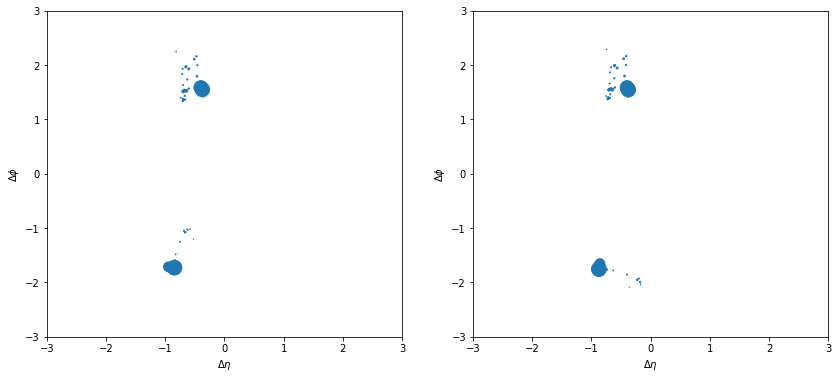

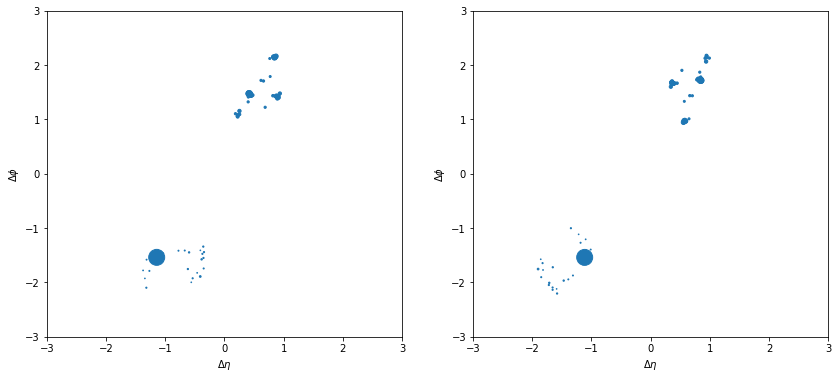

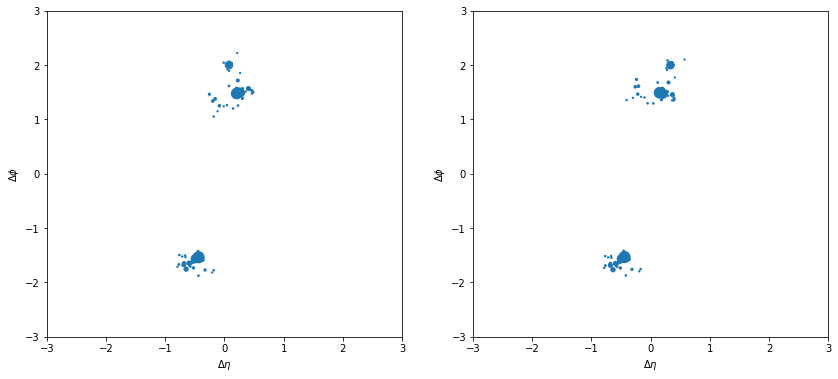

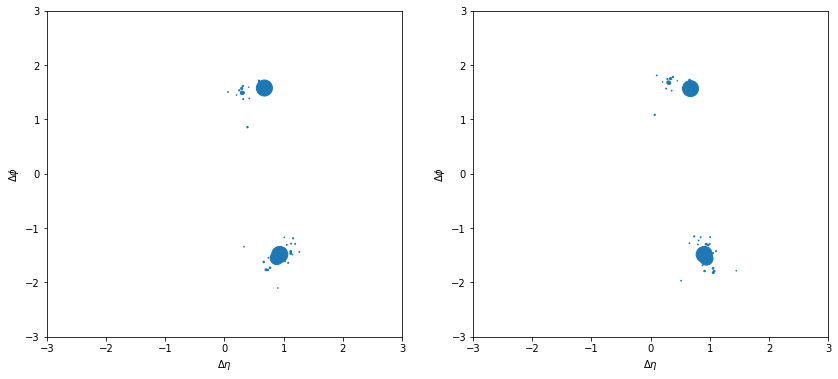

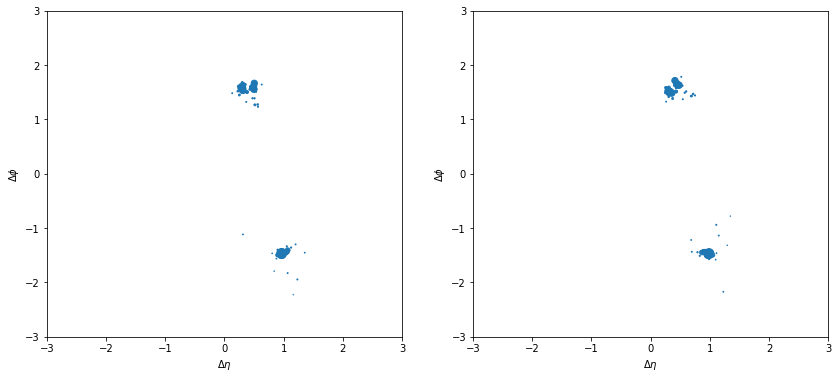

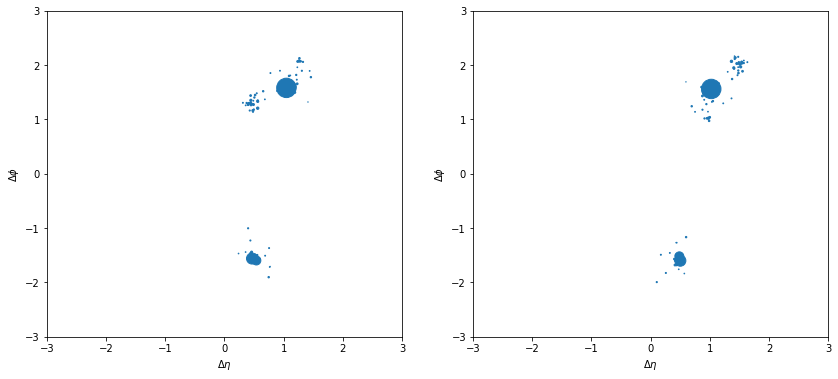

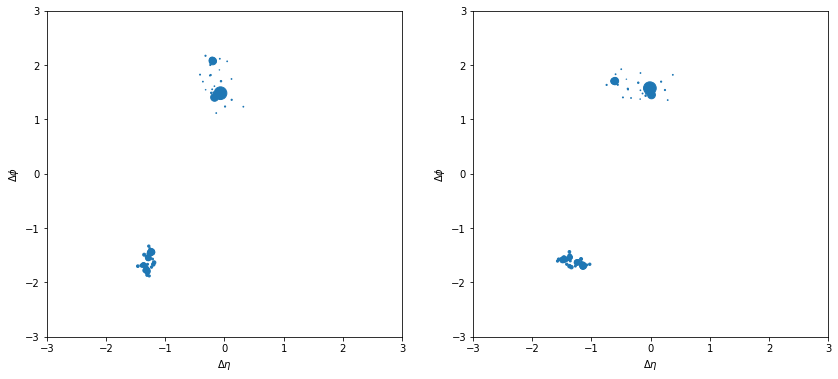

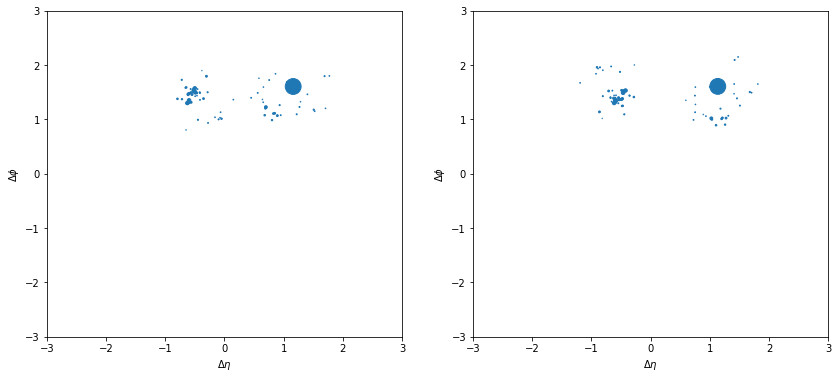

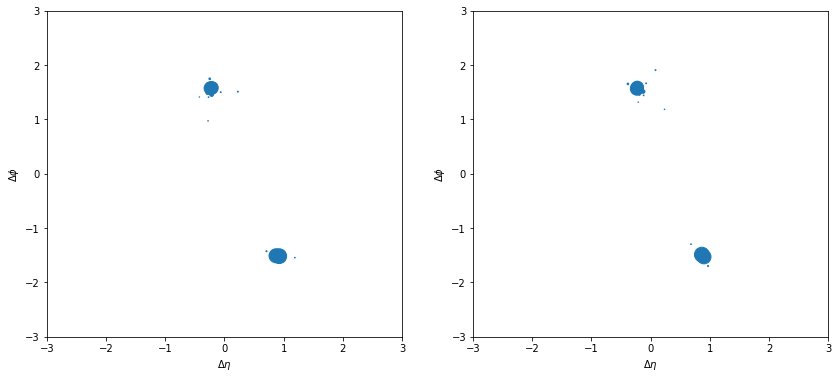

In [4]:
#path_to_data_storage = "/clusterfs/ml4hep/rrmastandrea/processed_data/"+"dijet"+"/"



#high_mass_consits_wjet_deltaJ1 = np.load(path_to_data_storage+"50_jets_J1_pi_2.npy")

max_pt = np.max(clr_train[0][0])
ptcm = 5*max_pt

rot = True
trs = False
trsw = 1.0
dis = False
ptst = .1
col = False
ptcm = 1

orig_events, mod_events = apply_single_jet_augs(clr_train, 2, "J1_phi_only_pi_2", rot, trs, dis, col, trsw, ptst, ptcm)



for index_to_plot in range(9):

    
    plot_jets_phase_plane(orig_events[index_to_plot], mod_events[index_to_plot], .5, xlims=(-3,3), ylims=(-3,3))

    


# Plot nsubjettiness

In [ ]:
# calculate n sub jettiness

# split the list of events into a larger list of jets

orig_events_long = np.concatenate(np.split(orig_events, 2, axis = 2), axis = 0)
mod_events_long = np.concatenate(np.split(mod_events, 2, axis = 2), axis = 0)

plot_nsubs(orig_events_long,mod_events_long)